In [2]:
# Create all normalized and filtered heatmaps

import os
import pandas as pd
import numpy as np
import json
from scipy.ndimage import gaussian_filter

# Folder containing input heatmap CSV files
heatmaps_folder = '_Heatmaps'
output_folder = '_normalized-heatmaps'

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Function to normalize a heatmap
def normalize_density(heatmap):
    """
    Normalize a heatmap so that the sum of all its values equals 1000.
    If the heatmap sum is 0, it remains unchanged.
    """
    heatmap = np.array(heatmap, dtype=float)  # Ensure the heatmap is a NumPy array
    total_sum = np.sum(heatmap)
    if total_sum == 0:  # If the heatmap is empty (all zeros), return it as is
        return heatmap
    normalized_heatmap = (heatmap / total_sum) * 1000
    return normalized_heatmap

# Function to apply a Gaussian filter
def apply_gaussian_filter(heatmap, sigma=1.0):
    """
    Apply a Gaussian filter to smooth the heatmap.
    """
    return gaussian_filter(heatmap, sigma=sigma)

# Get a sorted list of all CSV files in the folder
#heatmap_files = sorted([f for f in os.listdir(heatmaps_folder) if f.endswith('.csv')])
heatmap_files = [f for f in os.listdir(heatmaps_folder) if f.endswith('.csv')]

# Sort the files based on the number in the filename
heatmap_files = sorted(heatmap_files, key=lambda f: int(f.split('_')[2].split('.')[0]))


# Initialize the counter
chunk_number = 1

for file in heatmap_files:
    print(f"Processing file: {file}...")
    # Input and output file paths
    input_file = os.path.join(heatmaps_folder, file)
    output_file = os.path.join(output_folder, f'normalized-heatmaps-chunk-{chunk_number}.csv')

    # Load the CSV file
    df = pd.read_csv(input_file)

    # Process each heatmap column
    heatmap_columns = [
        'passes-start-heatmap', 'carries-start-heatmap', 'crosses-start-heatmap', 
        'shots-start-heatmap', 'recoveries-start-heatmap', 'tackles-start-heatmap', 
        'take-ons-start-heatmap', 'aerial-start-heatmap', 'passes-end-heatmap', 
        'carries-end-heatmap'
    ]

    for col in heatmap_columns:
        # Parse the JSON string into a Python list
        df[col] = df[col].apply(lambda x: json.loads(x) if isinstance(x, str) else x)

        # Convert the list into a NumPy array and process it
        df[col] = df[col].apply(
            lambda heatmap: apply_gaussian_filter(
                normalize_density(np.array(heatmap))  # Normalize and filter
            ).tolist() if isinstance(heatmap, list) else heatmap
        )

    # Save the processed DataFrame to a new CSV file
    df.to_csv(output_file, index=False)

    # Increment the counter
    chunk_number += 1


Processing file: heatmaps_chunk_1.csv...
Processing file: heatmaps_chunk_2.csv...
Processing file: heatmaps_chunk_3.csv...
Processing file: heatmaps_chunk_4.csv...
Processing file: heatmaps_chunk_5.csv...
Processing file: heatmaps_chunk_6.csv...
Processing file: heatmaps_chunk_7.csv...
Processing file: heatmaps_chunk_8.csv...
Processing file: heatmaps_chunk_9.csv...
Processing file: heatmaps_chunk_10.csv...
Processing file: heatmaps_chunk_11.csv...
Processing file: heatmaps_chunk_12.csv...
Processing file: heatmaps_chunk_13.csv...
Processing file: heatmaps_chunk_14.csv...
Processing file: heatmaps_chunk_15.csv...
Processing file: heatmaps_chunk_16.csv...
Processing file: heatmaps_chunk_17.csv...
Processing file: heatmaps_chunk_18.csv...
Processing file: heatmaps_chunk_19.csv...
Processing file: heatmaps_chunk_20.csv...
Processing file: heatmaps_chunk_21.csv...
Processing file: heatmaps_chunk_22.csv...
Processing file: heatmaps_chunk_23.csv...
Processing file: heatmaps_chunk_24.csv...


In [5]:
#Testing

import os
import pandas as pd
import numpy as np
import json
from scipy.ndimage import gaussian_filter

# Folder containing input heatmap CSV files
heatmaps_folder = '_Heatmaps'
output_folder = '_normalized-heatmaps'

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Function to normalize a heatmap
def normalize_density(heatmap):
    """
    Normalize a heatmap so that the sum of all its values equals 1000.
    If the heatmap sum is 0, it remains unchanged.
    """
    heatmap = np.array(heatmap, dtype=float)  # Ensure the heatmap is a NumPy array
    total_sum = np.sum(heatmap)
    if total_sum == 0:  # If the heatmap is empty (all zeros), return it as is
        return heatmap
    normalized_heatmap = (heatmap / total_sum) * 1000
    return normalized_heatmap

# Function to apply a Gaussian filter
def apply_gaussian_filter(heatmap, sigma=1.0):
    """
    Apply a Gaussian filter to smooth the heatmap.
    """
    return gaussian_filter(heatmap, sigma=sigma)

# Get a sorted list of all CSV files in the folder
heatmap_files = ['heatmaps_chunk_1.csv']

# Initialize the counter
chunk_number = 1

for file in heatmap_files:
    print(f"Processing file: {file}...")
    # Input and output file paths
    input_file = os.path.join(heatmaps_folder, file)
    output_file = os.path.join(output_folder, f'normalized-heatmaps-chunk-{chunk_number}.csv')

    # Load the CSV file
    df = pd.read_csv(input_file,nrows=5)

    # Process each heatmap column
    heatmap_columns = [
        'passes-start-heatmap', 'carries-start-heatmap', 'crosses-start-heatmap', 
        'shots-start-heatmap', 'recoveries-start-heatmap', 'tackles-start-heatmap', 
        'take-ons-start-heatmap', 'aerial-start-heatmap', 'passes-end-heatmap', 
        'carries-end-heatmap'
    ]

    for col in heatmap_columns:
        # Parse the JSON string into a Python list
        df[col] = df[col].apply(lambda x: json.loads(x) if isinstance(x, str) else x)

        # Convert the list into a NumPy array and process it
        df[col] = df[col].apply(
            lambda heatmap: apply_gaussian_filter(
                normalize_density(np.array(heatmap))  # Normalize and filter
            ).tolist() if isinstance(heatmap, list) else heatmap
        )

    # Save the processed DataFrame to a new CSV file
    df.to_csv(output_file, index=False)

    # Increment the counter
    chunk_number += 1

Processing file: heatmaps_chunk_1.csv...


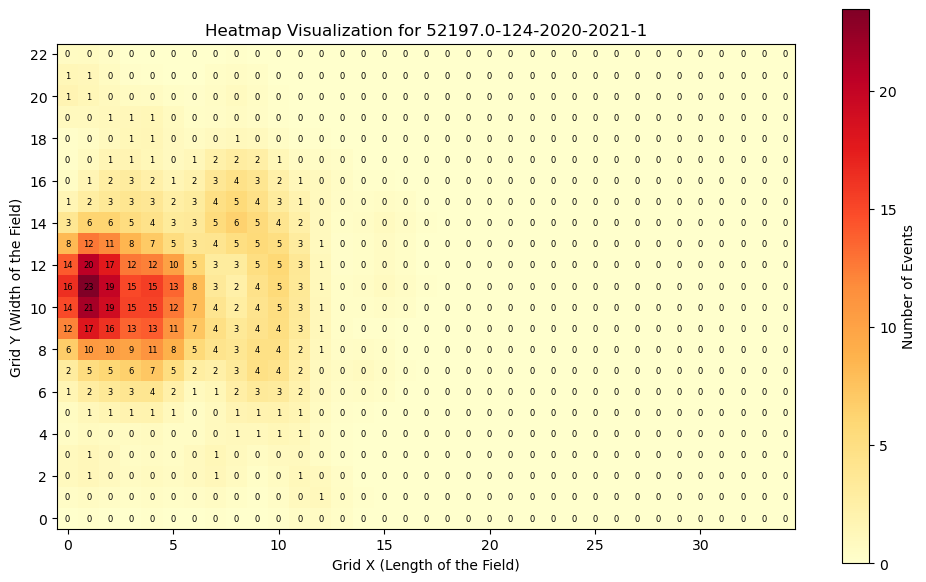

In [10]:
# Visualize example heatmap

import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the generated CSV file
csv_filename = "_normalized-heatmaps/normalized-heatmaps-chunk-1.csv"
heatmaps_df = pd.read_csv(csv_filename)

# Filter for the specific heatmapsId
heatmaps_id = "52197.0-124-2020-2021-1"
specific_row = heatmaps_df[heatmaps_df['heatmapsId'] == heatmaps_id]

if not specific_row.empty:
    # Extract the JSON string from the 'shots-start-heatmap' column
    heatmap_json = specific_row.iloc[0]['passes-start-heatmap']

    # Convert the JSON string to a Python list
    heatmap_grid = np.array(json.loads(heatmap_json))  # Convert to NumPy array for visualization

    # Transpose the heatmap for proper horizontal pitch orientation
    heatmap_grid = heatmap_grid.T

    # Create a visualization using Matplotlib
    plt.figure(figsize=(10, 6))
    plt.imshow(heatmap_grid, cmap='YlOrRd', interpolation='nearest', origin='lower')
    plt.colorbar(label="Number of Events")
    plt.title(f"Heatmap Visualization for {heatmaps_id}")
    plt.xlabel("Grid X (Length of the Field)")
    plt.ylabel("Grid Y (Width of the Field)")
    plt.xticks(ticks=range(0, 35, 5), labels=range(0, 35, 5))  # Adjust for grid length
    plt.yticks(ticks=range(0, 23, 2), labels=range(0, 23, 2))  # Adjust for grid width

    # Annotate each cell with the event count
    for x in range(heatmap_grid.shape[0]):
        for y in range(heatmap_grid.shape[1]):
            plt.text(y, x, int(heatmap_grid[x, y]), ha='center', va='center', color='black', fontsize=6)

    plt.tight_layout()
    plt.show()
else:
    print(f"No data found for heatmapsId {heatmaps_id}")

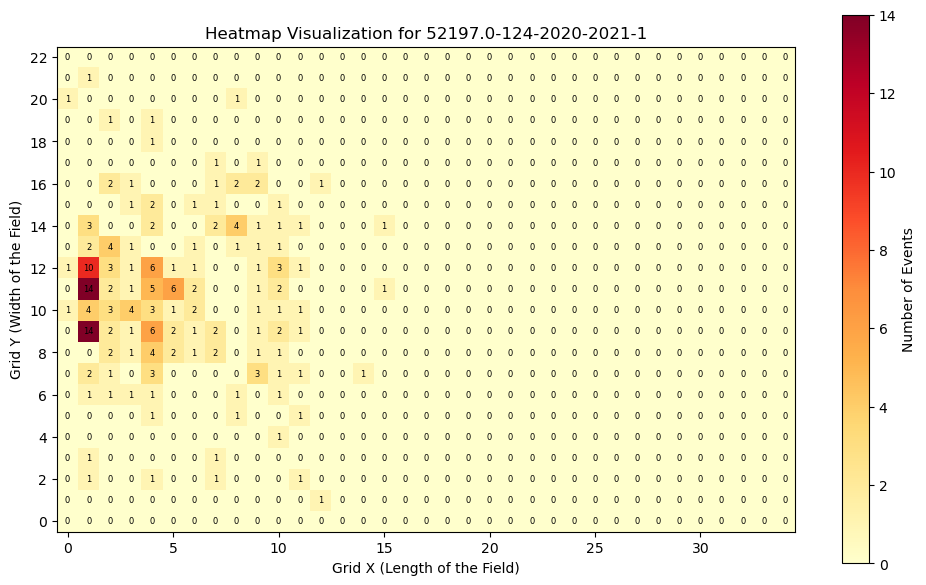

In [ ]:
# Visualize example un-normalized heatmap to compare with the normalized one and check for consistency

import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the generated CSV file
csv_filename = "_Heatmaps/heatmaps_chunk_1.csv"
heatmaps_df = pd.read_csv(csv_filename)

# Filter for the specific heatmapsId
heatmaps_id = "52197.0-124-2020-2021-1"
specific_row = heatmaps_df[heatmaps_df['heatmapsId'] == heatmaps_id]

if not specific_row.empty:
    # Extract the JSON string from the 'shots-start-heatmap' column
    heatmap_json = specific_row.iloc[0]['passes-start-heatmap']

    # Convert the JSON string to a Python list
    heatmap_grid = np.array(json.loads(heatmap_json))  # Convert to NumPy array for visualization

    # Transpose the heatmap for proper horizontal pitch orientation
    heatmap_grid = heatmap_grid.T

    # Create a visualization using Matplotlib
    plt.figure(figsize=(10, 6))
    plt.imshow(heatmap_grid, cmap='YlOrRd', interpolation='nearest', origin='lower')
    plt.colorbar(label="Number of Events")
    plt.title(f"Heatmap Visualization for {heatmaps_id}")
    plt.xlabel("Grid X (Length of the Field)")
    plt.ylabel("Grid Y (Width of the Field)")
    plt.xticks(ticks=range(0, 35, 5), labels=range(0, 35, 5))  # Adjust for grid length
    plt.yticks(ticks=range(0, 23, 2), labels=range(0, 23, 2))  # Adjust for grid width

    # Annotate each cell with the event count
    for x in range(heatmap_grid.shape[0]):
        for y in range(heatmap_grid.shape[1]):
            plt.text(y, x, int(heatmap_grid[x, y]), ha='center', va='center', color='black', fontsize=6)

    plt.tight_layout()
    plt.show()
else:
    print(f"No data found for heatmapsId {heatmaps_id}")